In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers
import numpy as np

normalized_data = pd.read_csv("normalized_data_with_predicted_age.csv", index_col=0)
normalized_data 

Using TensorFlow backend.


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,W./C.,STON/O,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.260001,0.0,0.000000,0.015070,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1302,NaN,1.0,0.259994,0.0,0.000000,0.015127,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,NaN,1.0,0.360627,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into train and test

In [2]:
normalized_train_data = normalized_data[normalized_data.Survived.notna()]
normalized_test_data = normalized_data[normalized_data.Survived.isna()]
normalized_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,...,SOTON/O.Q.,2.,W./C.,STON/O,CA.,A/5,SC/PARIS,2343,CA,A/5.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.271174,0.2,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.472229,0.2,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.321438,0.0,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.434531,0.0,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0.0,1.0,0.331168,0.0,0.000000,0.014110,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
864,0.0,1.0,0.267828,1.6,0.333333,0.135753,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
869,0.0,1.0,0.360791,0.0,0.000000,0.018543,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating model

In [3]:
x_train = normalized_train_data.drop(["Survived"], axis=1).values
y_train = normalized_train_data["Survived"].values

number_of_epochs = 40
number_of_folds = 5
number_of_samples = len(x_train) // number_of_folds

all_histories = []

for i in range(number_of_folds):
    print("processing fold #", i)
    
    partial_x_train = np.concatenate([x_train[:i*number_of_samples],
                                          x_train[(i+1)*number_of_samples:]])
    parital_y_train = np.concatenate([y_train[:i*number_of_samples],
                                          y_train[(i+1)*number_of_samples:]])
    
    partial_x_validation = x_train[i*number_of_samples:(i+1)*number_of_samples]
    partial_y_validation = y_train[i*number_of_samples:(i+1)*number_of_samples]
    
    model = models.Sequential()
    model.add(layers.Dense(x_train.shape[1], activation="relu", input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(12, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["acc"])

    history = model.fit(partial_x_train,
                        parital_y_train,
                        epochs=number_of_epochs,
                        batch_size=16,
                        validation_data=[partial_x_validation,partial_y_validation])
    all_histories.append(history.history)

processing fold # 0
Train on 713 samples, validate on 178 samples
Epoch 1/40
713/713 [==============================] - 0s 314us/step - loss: 0.5914 - acc: 0.7630 - val_loss: 0.5217 - val_acc: 0.8034
Epoch 2/40
713/713 [==============================] - 0s 142us/step - loss: 0.4991 - acc: 0.8022 - val_loss: 0.4784 - val_acc: 0.8202
Epoch 3/40
713/713 [==============================] - 0s 126us/step - loss: 0.4712 - acc: 0.8022 - val_loss: 0.4696 - val_acc: 0.8034
Epoch 4/40
713/713 [==============================] - 0s 133us/step - loss: 0.4572 - acc: 0.8022 - val_loss: 0.4621 - val_acc: 0.8146
Epoch 5/40
713/713 [==============================] - 0s 136us/step - loss: 0.4483 - acc: 0.8065 - val_loss: 0.4638 - val_acc: 0.8090
Epoch 6/40
713/713 [==============================] - 0s 163us/step - loss: 0.4421 - acc: 0.8093 - val_loss: 0.4643 - val_acc: 0.8090
Epoch 7/40
713/713 [==============================] - 0s 120us/step - loss: 0.4365 - acc: 0.8050 - val_loss: 0.4620 - val_acc: 0.8

Epoch 21/40
713/713 [==============================] - 0s 128us/step - loss: 0.4066 - acc: 0.8275 - val_loss: 0.4499 - val_acc: 0.7978
Epoch 22/40
713/713 [==============================] - 0s 121us/step - loss: 0.4060 - acc: 0.8191 - val_loss: 0.4502 - val_acc: 0.7978
Epoch 23/40
713/713 [==============================] - 0s 121us/step - loss: 0.4043 - acc: 0.8233 - val_loss: 0.4500 - val_acc: 0.8034
Epoch 24/40
713/713 [==============================] - 0s 123us/step - loss: 0.4025 - acc: 0.8275 - val_loss: 0.4484 - val_acc: 0.7978
Epoch 25/40
713/713 [==============================] - 0s 120us/step - loss: 0.4017 - acc: 0.8289 - val_loss: 0.4462 - val_acc: 0.7921
Epoch 26/40
713/713 [==============================] - 0s 123us/step - loss: 0.3994 - acc: 0.8289 - val_loss: 0.4464 - val_acc: 0.7921
Epoch 27/40
713/713 [==============================] - 0s 129us/step - loss: 0.3963 - acc: 0.8317 - val_loss: 0.4538 - val_acc: 0.8034
Epoch 28/40
713/713 [==============================] - 

713/713 [==============================] - 0s 294us/step - loss: 0.6335 - acc: 0.7265 - val_loss: 0.5688 - val_acc: 0.8258
Epoch 2/40
713/713 [==============================] - 0s 131us/step - loss: 0.5395 - acc: 0.7980 - val_loss: 0.4880 - val_acc: 0.8146
Epoch 3/40
713/713 [==============================] - 0s 121us/step - loss: 0.4855 - acc: 0.7994 - val_loss: 0.4461 - val_acc: 0.8090
Epoch 4/40
713/713 [==============================] - 0s 120us/step - loss: 0.4631 - acc: 0.7994 - val_loss: 0.4362 - val_acc: 0.8202
Epoch 5/40
713/713 [==============================] - 0s 132us/step - loss: 0.4574 - acc: 0.8065 - val_loss: 0.4192 - val_acc: 0.8146
Epoch 6/40
713/713 [==============================] - 0s 110us/step - loss: 0.4468 - acc: 0.8093 - val_loss: 0.4124 - val_acc: 0.8090
Epoch 7/40
713/713 [==============================] - 0s 131us/step - loss: 0.4436 - acc: 0.8079 - val_loss: 0.4055 - val_acc: 0.8146
Epoch 8/40
713/713 [==============================] - 0s 122us/step - los

713/713 [==============================] - 0s 123us/step - loss: 0.3992 - acc: 0.8345 - val_loss: 0.4137 - val_acc: 0.8315
Epoch 22/40
713/713 [==============================] - 0s 131us/step - loss: 0.3988 - acc: 0.8289 - val_loss: 0.4132 - val_acc: 0.8315
Epoch 23/40
713/713 [==============================] - 0s 120us/step - loss: 0.3950 - acc: 0.8303 - val_loss: 0.4138 - val_acc: 0.7809
Epoch 24/40
713/713 [==============================] - 0s 122us/step - loss: 0.3954 - acc: 0.8247 - val_loss: 0.4145 - val_acc: 0.8315
Epoch 25/40
713/713 [==============================] - 0s 121us/step - loss: 0.3932 - acc: 0.8247 - val_loss: 0.4121 - val_acc: 0.8315
Epoch 26/40
713/713 [==============================] - 0s 129us/step - loss: 0.3930 - acc: 0.8261 - val_loss: 0.4072 - val_acc: 0.8371
Epoch 27/40
713/713 [==============================] - 0s 122us/step - loss: 0.3934 - acc: 0.8303 - val_loss: 0.4082 - val_acc: 0.8371
Epoch 28/40
713/713 [==============================] - 0s 125us/ste

## Drawing plots

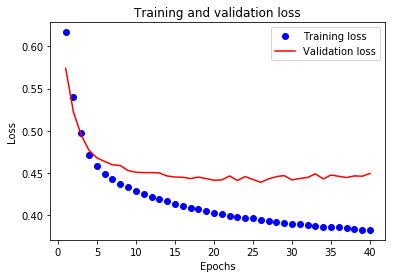

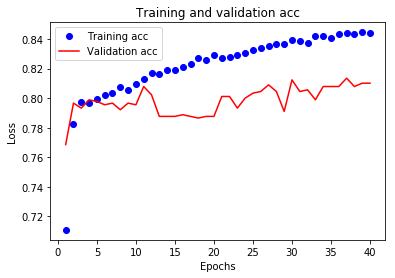

In [4]:
history_dict = history.history

loss_values = [np.mean([x["loss"][i] for x in all_histories]) for i in range(number_of_epochs)]
val_loss_values = [np.mean([x["val_loss"][i] for x in all_histories]) for i in range(number_of_epochs)]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss", color="red")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


acc_values = [np.mean([x["acc"][i] for x in all_histories]) for i in range(number_of_epochs)]
val_acc_values = [np.mean([x["val_acc"][i] for x in all_histories]) for i in range(number_of_epochs)]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc", color="red")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Evaluate results

In [5]:
results = model.predict(normalized_test_data.drop(["Survived"], axis=1))
results = pd.DataFrame(results, columns=["Survived"], index=normalized_test_data.index)

results.loc[results.Survived < 0.5, ["Survived"]] = 0
results.loc[results.Survived >= 0.5, ["Survived"]] = 1
results = results.fillna(0)
results.Survived = results.Survived.astype(int)
results

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1300,1
1302,1
1305,0


## Save results

In [6]:
results.to_csv("Output/my_prediction.csv", index=True)

## Compare with genderr submission

In [7]:
compare = pd.read_csv("Dataset/gender_submission.csv", index_col=0)
# compare = pd.read_csv("7799.csv", index_col=0)
compare = compare.rename(columns={"Survived": "Example"})
compare = pd.concat([compare, results], axis=1)
compare = compare.rename(columns={"Survived": "MyPrediction"})
compare[compare.Example != compare.MyPrediction]

,Example,MyPrediction
PassengerId,,
893,1,0
913,0,1
925,1,0
926,0,1
928,1,0
956,0,1
960,0,1
964,1,0
967,0,1
